In [1]:
import json
from pprint import pprint
import matplotlib.pyplot as plt
import csv
%matplotlib inline  
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
#uncomment to see all content when printing out.WARNING as will take longer to print and will fill in the screen!
#np.set_printoptions(threshold=np.nan)
  
#loading json file and assign it to a variable.
####the file is too large (even compressed) so it is not attached to github.####
data = json.load(open('TDS_sound_analysis.json', 'rb'))
 
#pprint(data) #printing just for checking for purposes. better uncommented as might slow down computer due to its size

In [2]:
#importing CSV files 


with open('csv_files/bright.csv', 'rb') as f:
    reader = csv.reader(f)
    bright_list_csv = list(reader)
    #removing brackets from list. same for the rest of the csv files
    bright_list = [l[0] for l in bright_list_csv]
    
with open('csv_files/warm.csv', 'rb') as f:
    reader = csv.reader(f)
    warm_list_csv = list(reader)
    warm_list = [l[0] for l in warm_list_csv]
    
with open('csv_files/rough.csv', 'rb') as f:
    reader = csv.reader(f)
    rough_list_csv = map(tuple, reader)
    rough_list = [l[0] for l in rough_list_csv]
    
with open('csv_files/reverb.csv', 'rb') as f:
    reader = csv.reader(f)
    reverb_list_csv = map(tuple, reader)
    reverb_list = [l[0] for l in reverb_list_csv]
    
with open('csv_files/clear.csv', 'rb') as f:
    reader = csv.reader(f)
    clear_list_csv = list(reader)
    clear_list = [l[0] for l in clear_list_csv]
    
with open('csv_files/hollow.csv', 'rb') as f:
    reader = csv.reader(f)
    hollow_list_csv = list(reader)
    hollow_list = [l[0] for l in hollow_list_csv]
    
with open('csv_files/deep.csv', 'rb') as f:
    reader = csv.reader(f)
    deep_list_csv = list(reader)
    deep_list = [l[0] for l in deep_list_csv]
    
with open('csv_files/punchy.csv', 'rb') as f:
    reader = csv.reader(f)
    punchy_list_csv = list(reader)
    punchy_list = [l[0] for l in punchy_list_csv]
    
with open('csv_files/metallic.csv', 'rb') as f:
    reader = csv.reader(f)
    metallic_list_csv = list(reader)
    metallic_list = [l[0] for l in metallic_list_csv]
    
with open('csv_files/sharp.csv', 'rb') as f:
    reader = csv.reader(f)
    sharp_list_csv = list(reader)
    sharp_list = [l[0] for l in sharp_list_csv]
    
with open('csv_files/hard.csv', 'rb') as f:
    reader = csv.reader(f)
    hard_list_csv = list(reader) 
    hard_list = [l[0] for l in hard_list_csv]


In [3]:
#bright_list #check out content of this list, change name to other list (eg. hard_list) to see their content

In [4]:
#Number of UNIQUE sounds within the dataset
nb_sounds = len(set(bright_list + hard_list +warm_list + rough_list + reverb_list + clear_list + hollow_list + deep_list + punchy_list + metallic_list + sharp_list))


In [5]:
#printing out to know number of sounds
nb_sounds

4298

# COMPUTING DESCRIPTORS MEAN

In [6]:
#BRIGHT DESCRIPTORS
sc_bright_mean = []
sflux_bright_mean = []
mfcc_bright_mean = []
zcr_bright_mean = []
trist_bright_mean = []
oteher_bright_mean = []
lat_bright_mean = []

#HARD DESCRIPTORS
sc_hard_mean = []
sflux_hard_mean = []
mfcc_hard_mean = []
zcr_hard_mean = []
trist_hard_mean = []
oteher_hard_mean = []
lat_hard_mean = []

#WARM DESCRIPTORS
sc_warm_mean = []
sflux_warm_mean = []
mfcc_warm_mean = []
zcr_warm_mean = []
trist_warm_mean = []
oteher_warm_mean = []
lat_warm_mean = []

#ROUGH DESCRIPTORS
sc_rough_mean = []
sflux_rough_mean = []
mfcc_rough_mean = []
zcr_rough_mean = []
trist_rough_mean = []
oteher_rough_mean = []
lat_rough_mean = []

#REVERB DESCRIPTORS
sc_reverb_mean = []
sflux_reverb_mean = []
mfcc_reverb_mean = []
zcr_reverb_mean = []
trist_reverb_mean = []
oteher_reverb_mean = []
lat_reverb_mean = []

#CLEAR DESCRIPTORS
sc_clear_mean = []
sflux_clear_mean = []
mfcc_clear_mean = []
zcr_clear_mean = []
trist_clear_mean = []
oteher_clear_mean = []
lat_clear_mean = []

#HOLLOW DESCRIPTORS
sc_hollow_mean = []
sflux_hollow_mean = []
mfcc_hollow_mean = []
zcr_hollow_mean = []
trist_hollow_mean = []
oteher_hollow_mean = []
lat_hollow_mean = []

#DEEP DESCRIPTORS
sc_deep_mean = []
sflux_deep_mean = []
mfcc_deep_mean = []
zcr_deep_mean = []
trist_deep_mean = []
oteher_deep_mean = []
lat_deep_mean = []

#PUNCHY DESCRIPTORS
sc_punchy_mean = []
sflux_punchy_mean = []
mfcc_punchy_mean = []
zcr_punchy_mean = []
trist_punchy_mean = []
oteher_punchy_mean = []
lat_punchy_mean = []

#METALLIC DESCRIPTORS
sc_metallic_mean = []
sflux_metallic_mean = []
mfcc_metallic_mean = []
zcr_metallic_mean = []
trist_metallic_mean = []
oteher_metallic_mean = []
lat_metallic_mean = []

#SHARP DESCRIPTORS
sc_sharp_mean = []
sflux_sharp_mean = []
mfcc_sharp_mean = []
zcr_sharp_mean = []
trist_sharp_mean = []
oteher_sharp_mean = []
lat_sharp_mean = []


for fs_id in data:
    if fs_id in bright_list: 
        #assigning 
        feature_vector_sc_mean_bright = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"] 
        feature_vector_sflux_mean_bright = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]
        feature_vector_mfcc_mean_bright = data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"][1:] #removing 1st element,ie.energy
        feature_vector_zcr_mean_bright = data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]
        feature_vector_trist_mean_bright = data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"]
        feature_vector_oteher_mean_bright = data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]
        feature_vector_lat_mean_bright = data[fs_id]["analysis_stats"]["sfx"]["logattacktime"]["mean"]
        
        #appending. not sure if better outside or inside the for loop due to the iterations process...to be revised
        sc_bright_mean.append(feature_vector_sc_mean_bright) 
        sflux_bright_mean.append(feature_vector_sflux_mean_bright)
        mfcc_bright_mean.append(feature_vector_mfcc_mean_bright)
        zcr_bright_mean.append(feature_vector_zcr_mean_bright)
        trist_bright_mean.append(feature_vector_trist_mean_bright)
        oteher_bright_mean.append(feature_vector_oteher_mean_bright)
        lat_bright_mean.append(feature_vector_lat_mean_bright)
        
    if fs_id in hard_list:  
        feature_vector_sc_mean_hard = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"] 
        feature_vector_sflux_mean_hard = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]
        feature_vector_mfcc_mean_hard = data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"][1:] #removing 1st element,ie.energy
        feature_vector_zcr_mean_hard = data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]
        feature_vector_trist_mean_hard = data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"]
        feature_vector_oteher_mean_hard = data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]            
        feature_vector_lat_mean_hard = data[fs_id]["analysis_stats"]["sfx"]["logattacktime"]["mean"]

        sc_hard_mean.append(feature_vector_sc_mean_hard)
        sflux_hard_mean.append(feature_vector_sflux_mean_hard)
        mfcc_hard_mean.append(feature_vector_mfcc_mean_hard)
        zcr_hard_mean.append(feature_vector_zcr_mean_hard)
        trist_hard_mean.append(feature_vector_trist_mean_hard)
        oteher_hard_mean.append(feature_vector_oteher_mean_hard)
        lat_hard_mean.append(feature_vector_lat_mean_hard)


    if fs_id in warm_list: 
        feature_vector_sc_mean_warm = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"] 
        feature_vector_sflux_mean_warm = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]
        feature_vector_mfcc_mean_warm = data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"][1:] #removing 1st element,ie.energy
        feature_vector_zcr_mean_warm = data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]
        feature_vector_trist_mean_warm = data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"]
        feature_vector_oteher_mean_warm = data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]
        feature_vector_lat_mean_warm = data[fs_id]["analysis_stats"]["sfx"]["logattacktime"]["mean"]


        sc_warm_mean.append(feature_vector_sc_mean_warm) 
        sflux_warm_mean.append(feature_vector_sflux_mean_warm)
        mfcc_warm_mean.append(feature_vector_mfcc_mean_warm)
        zcr_warm_mean.append(feature_vector_zcr_mean_warm)
        trist_warm_mean.append(feature_vector_trist_mean_warm)
        oteher_warm_mean.append(feature_vector_oteher_mean_warm)
        lat_warm_mean.append(feature_vector_lat_mean_warm)

        
    if fs_id in rough_list:  
        feature_vector_sc_mean_rough = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"] 
        feature_vector_sflux_mean_rough = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]
        feature_vector_mfcc_mean_rough = data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"][1:] #removing 1st element,ie.energy             
        feature_vector_zcr_mean_rough = data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]
        feature_vector_trist_mean_rough = data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"]
        feature_vector_oteher_mean_rough = data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]
        feature_vector_lat_mean_rough = data[fs_id]["analysis_stats"]["sfx"]["logattacktime"]["mean"]


        sc_rough_mean.append(feature_vector_sc_mean_rough)
        sflux_rough_mean.append(feature_vector_sflux_mean_rough)
        mfcc_rough_mean.append(feature_vector_mfcc_mean_rough)
        zcr_rough_mean.append(feature_vector_zcr_mean_rough)
        trist_rough_mean.append(feature_vector_trist_mean_rough)
        oteher_rough_mean.append(feature_vector_oteher_mean_rough)
        lat_rough_mean.append(feature_vector_lat_mean_rough)
        
    if fs_id in reverb_list: 
        feature_vector_sc_mean_reverb = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"] 
        feature_vector_sflux_mean_reverb = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]
        feature_vector_mfcc_mean_reverb = data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"][1:] #removing 1st element,ie.energy
        feature_vector_zcr_mean_reverb = data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]
        feature_vector_trist_mean_reverb = data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"]
        feature_vector_oteher_mean_reverb = data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]
        feature_vector_lat_mean_reverb = data[fs_id]["analysis_stats"]["sfx"]["logattacktime"]["mean"]

        sc_reverb_mean.append(feature_vector_sc_mean_reverb) 
        sflux_reverb_mean.append(feature_vector_sflux_mean_reverb)
        mfcc_reverb_mean.append(feature_vector_mfcc_mean_reverb)
        zcr_reverb_mean.append(feature_vector_zcr_mean_reverb)
        trist_reverb_mean.append(feature_vector_trist_mean_reverb)
        oteher_reverb_mean.append(feature_vector_oteher_mean_reverb)
        lat_reverb_mean.append(feature_vector_lat_mean_reverb)
        
    if fs_id in clear_list:  
        feature_vector_sc_mean_clear = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"] 
        feature_vector_sflux_mean_clear = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]
        feature_vector_mfcc_mean_clear = data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"][1:] #removing 1st element,ie.energy
        feature_vector_zcr_mean_clear = data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]
        feature_vector_trist_mean_clear = data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"]
        feature_vector_oteher_mean_clear = data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]
        feature_vector_lat_mean_clear = data[fs_id]["analysis_stats"]["sfx"]["logattacktime"]["mean"]

        sc_clear_mean.append(feature_vector_sc_mean_clear)
        sflux_clear_mean.append(feature_vector_sflux_mean_clear)
        mfcc_clear_mean.append(feature_vector_mfcc_mean_clear)
        zcr_clear_mean.append(feature_vector_zcr_mean_clear)
        trist_clear_mean.append(feature_vector_trist_mean_clear)
        oteher_clear_mean.append(feature_vector_oteher_mean_clear)
        lat_clear_mean.append(feature_vector_lat_mean_clear)
        
    if fs_id in hollow_list: 
        feature_vector_sc_mean_hollow = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"] 
        feature_vector_sflux_mean_hollow = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]
        feature_vector_mfcc_mean_hollow = data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"][1:] #removing 1st element,ie.energy
        feature_vector_zcr_mean_hollow = data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]
        feature_vector_trist_mean_hollow = data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"]
        feature_vector_oteher_mean_hollow = data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]
        feature_vector_lat_mean_hollow = data[fs_id]["analysis_stats"]["sfx"]["logattacktime"]["mean"]

  
        sc_hollow_mean.append(feature_vector_sc_mean_hollow) 
        sflux_hollow_mean.append(feature_vector_sflux_mean_hollow)
        mfcc_hollow_mean.append(feature_vector_mfcc_mean_hollow)
        zcr_hollow_mean.append(feature_vector_zcr_mean_hollow)
        trist_hollow_mean.append(feature_vector_trist_mean_hollow)
        oteher_hollow_mean.append(feature_vector_oteher_mean_hollow)
        lat_hollow_mean.append(feature_vector_lat_mean_hollow)
        
    if fs_id in deep_list:  
        feature_vector_sc_mean_deep = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"] 
        feature_vector_sflux_mean_deep = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]
        feature_vector_mfcc_mean_deep = data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"][1:] #removing 1st element,ie.energy
        feature_vector_zcr_mean_deep = data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]
        feature_vector_trist_mean_deep = data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"]
        feature_vector_oteher_mean_deep = data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]
        feature_vector_lat_mean_deep = data[fs_id]["analysis_stats"]["sfx"]["logattacktime"]["mean"]

        sc_deep_mean.append(feature_vector_sc_mean_deep)
        sflux_deep_mean.append(feature_vector_sflux_mean_deep)
        mfcc_deep_mean.append(feature_vector_mfcc_mean_deep)
        zcr_deep_mean.append(feature_vector_zcr_mean_deep)
        trist_deep_mean.append(feature_vector_trist_mean_deep)
        oteher_deep_mean.append(feature_vector_oteher_mean_deep)        
        lat_deep_mean.append(feature_vector_lat_mean_deep)
        
    if fs_id in punchy_list: 
        feature_vector_sc_mean_punchy = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"] 
        feature_vector_sflux_mean_punchy = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]
        feature_vector_mfcc_mean_punchy = data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"][1:] #removing 1st element,ie.energy
        feature_vector_zcr_mean_punchy = data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]
        feature_vector_trist_mean_punchy = data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"]
        feature_vector_oteher_mean_punchy = data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]
        feature_vector_lat_mean_punchy = data[fs_id]["analysis_stats"]["sfx"]["logattacktime"]["mean"]

        sc_punchy_mean.append(feature_vector_sc_mean_punchy) 
        sflux_punchy_mean.append(feature_vector_sflux_mean_punchy)
        mfcc_punchy_mean.append(feature_vector_mfcc_mean_punchy)
        zcr_punchy_mean.append(feature_vector_zcr_mean_punchy)
        trist_punchy_mean.append(feature_vector_trist_mean_punchy)
        oteher_punchy_mean.append(feature_vector_oteher_mean_punchy)
        lat_punchy_mean.append(feature_vector_lat_mean_punchy)
        
    if fs_id in metallic_list:  
        feature_vector_sc_mean_metallic = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"] 
        feature_vector_sflux_mean_metallic = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]
        feature_vector_mfcc_mean_metallic = data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"][1:] #removing 1st element,ie.energy
        feature_vector_zcr_mean_metallic = data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]
        feature_vector_trist_mean_metallic = data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"]
        feature_vector_oteher_mean_metallic = data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]
        feature_vector_lat_mean_metallic = data[fs_id]["analysis_stats"]["sfx"]["logattacktime"]["mean"]
      
        sc_metallic_mean.append(feature_vector_sc_mean_metallic)
        sflux_metallic_mean.append(feature_vector_sflux_mean_metallic)
        mfcc_metallic_mean.append(feature_vector_mfcc_mean_metallic)
        zcr_metallic_mean.append(feature_vector_zcr_mean_metallic)
        trist_metallic_mean.append(feature_vector_trist_mean_metallic)
        oteher_metallic_mean.append(feature_vector_oteher_mean_metallic)      
        lat_metallic_mean.append(feature_vector_lat_mean_metallic)
    
    if fs_id in sharp_list:  
        feature_vector_sc_mean_sharp = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"] 
        feature_vector_sflux_mean_sharp = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]
        feature_vector_mfcc_mean_sharp = data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"][1:] #removing 1st element,ie.energy
        feature_vector_zcr_mean_sharp = data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]
        feature_vector_trist_mean_sharp = data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"]
        feature_vector_oteher_mean_sharp = data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]
        feature_vector_lat_mean_sharp = data[fs_id]["analysis_stats"]["sfx"]["logattacktime"]["mean"]
    
        sc_sharp_mean.append(feature_vector_sc_mean_sharp)
        sflux_sharp_mean.append(feature_vector_sflux_mean_sharp)
        mfcc_sharp_mean.append(feature_vector_mfcc_mean_sharp)
        zcr_sharp_mean.append(feature_vector_zcr_mean_sharp)
        trist_sharp_mean.append(feature_vector_trist_mean_sharp)
        oteher_sharp_mean.append(feature_vector_oteher_mean_sharp)       
        lat_sharp_mean.append(feature_vector_lat_mean_sharp)
        
        
#creating numpy arrays       
sc_bright_mean = np.array(sc_bright_mean)
sflux_bright_mean = np.array(sflux_bright_mean)
mfcc_bright_mean = np.array(mfcc_bright_mean)
zcr_bright_mean = np.array(zcr_bright_mean)
trist_bright_mean = np.array(trist_bright_mean)
oteher_bright_mean = np.array(oteher_bright_mean)
lat_bright_mean = np.array(lat_bright_mean)

sc_hard_mean = np.array(sc_hard_mean)
sflux_hard_mean = np.array(sflux_hard_mean)
mfcc_hard_mean = np.array(mfcc_hard_mean)
zcr_hard_mean = np.array(zcr_hard_mean)
trist_hard_mean = np.array(trist_hard_mean)
oteher_hard_mean = np.array(oteher_hard_mean)
lat_hard_mean = np.array(lat_hard_mean)

sc_warm_mean = np.array(sc_warm_mean)
sflux_warm_mean = np.array(sflux_warm_mean)
mfcc_warm_mean = np.array(mfcc_warm_mean)
zcr_warm_mean = np.array(zcr_warm_mean)
trist_warm_mean = np.array(trist_warm_mean)
oteher_warm_mean = np.array(oteher_warm_mean)
lat_warm_mean = np.array(lat_warm_mean)

sc_rough_mean = np.array(sc_rough_mean)
sflux_rough_mean = np.array(sflux_rough_mean)
mfcc_rough_mean = np.array(mfcc_rough_mean)
zcr_rough_mean = np.array(zcr_rough_mean)
trist_rough_mean = np.array(trist_rough_mean)
oteher_rough_mean = np.array(oteher_rough_mean)
lat_rough_mean = np.array(lat_rough_mean)

sc_reverb_mean = np.array(sc_reverb_mean)
sflux_reverb_mean = np.array(sflux_reverb_mean)
mfcc_reverb_mean = np.array(mfcc_reverb_mean)
zcr_reverb_mean = np.array(zcr_reverb_mean)
trist_reverb_mean = np.array(trist_reverb_mean)
oteher_reverb_mean = np.array(oteher_reverb_mean)
lat_reverb_mean = np.array(lat_reverb_mean)

sc_clear_mean = np.array(sc_clear_mean)
sflux_clear_mean = np.array(sflux_clear_mean)
mfcc_clear_mean = np.array(mfcc_clear_mean)
zcr_clear_mean = np.array(zcr_clear_mean)
trist_clear_mean = np.array(trist_clear_mean)
oteher_clear_mean = np.array(oteher_clear_mean)
lat_clear_mean = np.array(lat_clear_mean)

sc_hollow_mean = np.array(sc_hollow_mean)
sflux_hollow_mean = np.array(sflux_hollow_mean)
mfcc_hollow_mean = np.array(mfcc_hollow_mean)
zcr_hollow_mean = np.array(zcr_hollow_mean)
trist_hollow_mean = np.array(trist_hollow_mean)
oteher_hollow_mean = np.array(oteher_hollow_mean)
lat_hollow_mean = np.array(lat_hollow_mean)

sc_deep_mean = np.array(sc_deep_mean)
sflux_deep_mean = np.array(sflux_deep_mean)
mfcc_deep_mean = np.array(mfcc_deep_mean)
zcr_deep_mean = np.array(zcr_deep_mean)
trist_deep_mean = np.array(trist_deep_mean)
oteher_deep_mean = np.array(oteher_deep_mean)
lat_deep_mean = np.array(lat_deep_mean)

sc_punchy_mean = np.array(sc_punchy_mean)
sflux_punchy_mean = np.array(sflux_punchy_mean)
mfcc_punchy_mean = np.array(mfcc_punchy_mean)
zcr_punchy_mean = np.array(zcr_punchy_mean)
trist_punchy_mean = np.array(trist_punchy_mean)
oteher_punchy_mean = np.array(oteher_punchy_mean)
lat_punchy_mean = np.array(lat_punchy_mean)

sc_metallic_mean = np.array(sc_metallic_mean)
sflux_metallic_mean = np.array(sflux_metallic_mean)
mfcc_metallic_mean = np.array(mfcc_metallic_mean)
zcr_metallic_mean = np.array(zcr_metallic_mean)
trist_metallic_mean = np.array(trist_metallic_mean)
oteher_metallic_mean = np.array(oteher_metallic_mean)
lat_metallic_mean = np.array(lat_metallic_mean)

sc_sharp_mean = np.array(sc_sharp_mean)
sflux_sharp_mean = np.array(sflux_sharp_mean)
mfcc_sharp_mean = np.array(mfcc_sharp_mean)
zcr_sharp_mean = np.array(zcr_sharp_mean)
trist_sharp_mean = np.array(trist_sharp_mean)
oteher_sharp_mean = np.array(oteher_sharp_mean)
lat_sharp_mean = np.array(lat_sharp_mean)



# SPECTRAL CENTROIDS boxplots

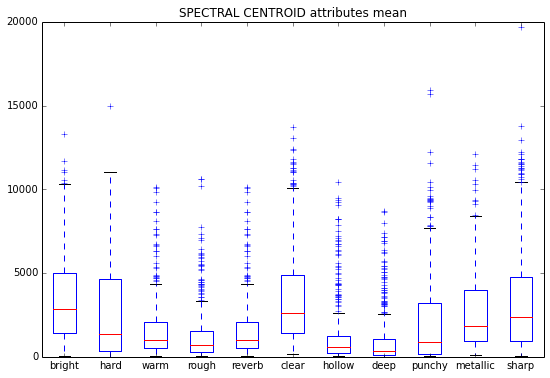

In [7]:

## combine these different collections into a list    
data_to_plot_sc = [sc_bright_mean,sc_hard_mean,sc_warm_mean,sc_rough_mean,sc_reverb_mean,sc_clear_mean,sc_hollow_mean,sc_deep_mean, sc_punchy_mean, sc_metallic_mean, sc_sharp_mean]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
#ax.set_xlabel('SPECTRAL CENTROID All Atributes comparison')
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11], ['bright', 'hard', 'warm','rough','reverb','clear','hollow','deep','punchy','metallic','sharp'])

# Create the boxplot
plt.title ('SPECTRAL CENTROID attributes mean')
bp = ax.boxplot(data_to_plot_sc)


# SPECTRAL FLUX boxplots

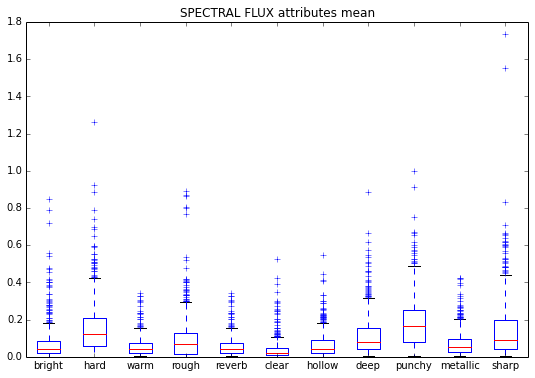

In [8]:
## combine these different collections into a list    
data_to_plot_sflux = [sflux_bright_mean,sflux_hard_mean,sflux_warm_mean,sflux_rough_mean,sflux_reverb_mean,sflux_clear_mean,sflux_hollow_mean,sflux_deep_mean, sflux_punchy_mean, sflux_metallic_mean, sflux_sharp_mean]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11], ['bright', 'hard', 'warm','rough','reverb','clear','hollow','deep','punchy','metallic','sharp'])


# Create the boxplot
plt.title ('SPECTRAL FLUX attributes mean')
bp = ax.boxplot(data_to_plot_sflux)

# MFCC boxplots (note there are 12 values, so needs considering

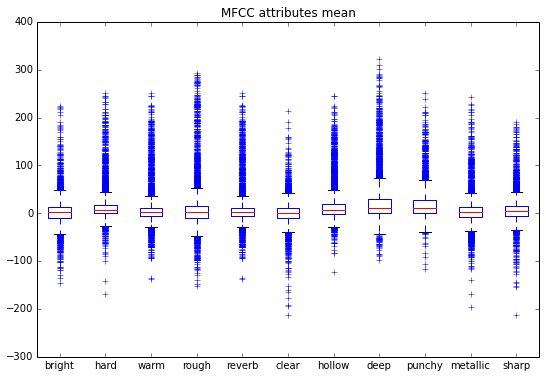

In [9]:

## combine these different collections into a list    
data_to_plot_mfcc = [mfcc_bright_mean,mfcc_hard_mean,mfcc_warm_mean,mfcc_rough_mean,mfcc_reverb_mean,mfcc_clear_mean,mfcc_hollow_mean,mfcc_deep_mean, mfcc_punchy_mean, mfcc_metallic_mean, mfcc_sharp_mean]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11], ['bright', 'hard', 'warm','rough','reverb','clear','hollow','deep','punchy','metallic','sharp'])



# Create the boxplot
plt.title ('MFCC attributes mean')
bp = ax.boxplot(data_to_plot_mfcc)

In [10]:
mfcc_bright_mean

array([[ -8.7269808 ,  -0.66147424,  -0.41374043, ...,  -0.75538062,
         -4.02860973,   6.68213778],
       [-27.00282211,  -3.2858612 ,  20.98407711, ...,   0.27151186,
          1.58458889,  -0.46440712],
       [ -1.51784098, -47.11845818,  -5.26246472, ...,  29.46572601,
         48.22119389,  32.81483793],
       ..., 
       [-19.75702913, -29.35418373, -30.21513982, ...,  -9.72480111,
         11.37203215,  -3.7164804 ],
       [  2.0533294 , -27.96635125,  -5.05391004, ..., -22.86427618,
        -20.0273316 , -12.37977896],
       [-57.94337924,   4.15400221,   3.3160858 , ...,  15.5887638 ,
        -12.43289063, -23.57237041]])

# ZERO CROSSING RATE boxplots

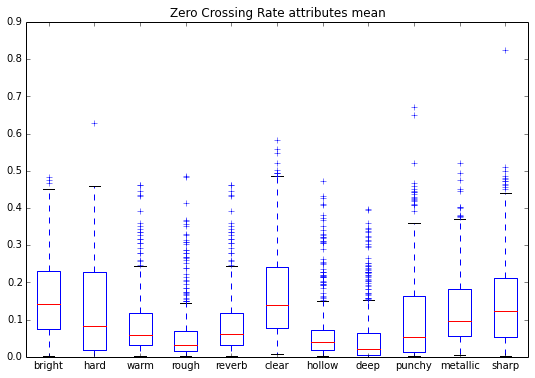

In [11]:

## combine these different collections into a list    
data_to_plot_zcr = [zcr_bright_mean,zcr_hard_mean,zcr_warm_mean,zcr_rough_mean,zcr_reverb_mean,zcr_clear_mean,zcr_hollow_mean,zcr_deep_mean, zcr_punchy_mean, zcr_metallic_mean, zcr_sharp_mean]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11], ['bright', 'hard', 'warm','rough','reverb','clear','hollow','deep','punchy','metallic','sharp'])


# Create the boxplot
plt.title ('Zero Crossing Rate attributes mean')
bp = ax.boxplot(data_to_plot_zcr)

# TRISTIMULUS boxplots (note there are 3 values, so need considering)

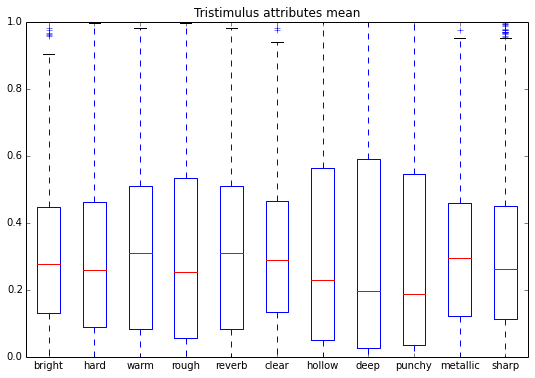

In [12]:

## combine these different collections into a list    
data_to_plot_trist = [trist_bright_mean,trist_hard_mean,trist_warm_mean,trist_rough_mean,trist_reverb_mean,trist_clear_mean,trist_hollow_mean,trist_deep_mean, trist_punchy_mean, trist_metallic_mean, trist_sharp_mean]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11], ['bright', 'hard', 'warm','rough','reverb','clear','hollow','deep','punchy','metallic','sharp'])


# Create the boxplot
plt.title ('Tristimulus attributes mean')
bp = ax.boxplot(data_to_plot_trist)

# Odd to even harmonic energy ratio boxplots 

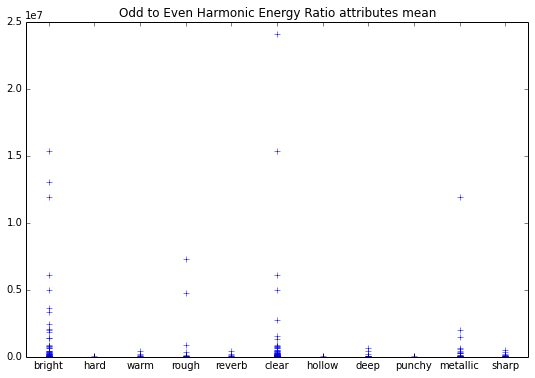

In [13]:

## combine these different collections into a list    
data_to_plot_oteher = [oteher_bright_mean,oteher_hard_mean,oteher_warm_mean,oteher_rough_mean,oteher_reverb_mean,oteher_clear_mean,oteher_hollow_mean,oteher_deep_mean, oteher_punchy_mean, oteher_metallic_mean, oteher_sharp_mean]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11], ['bright', 'hard', 'warm','rough','reverb','clear','hollow','deep','punchy','metallic','sharp'])


# Create the boxplot
plt.title ('Odd to Even Harmonic Energy Ratio attributes mean')
bp = ax.boxplot(data_to_plot_oteher)

# Log attack time boxplots 

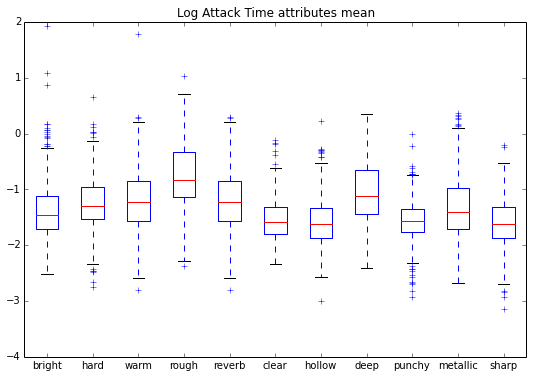

In [14]:

## combine these different collections into a list    
data_to_plot_lat = [lat_bright_mean,lat_hard_mean,lat_warm_mean,lat_rough_mean,lat_reverb_mean,lat_clear_mean,lat_hollow_mean,lat_deep_mean, lat_punchy_mean, lat_metallic_mean, lat_sharp_mean]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11], ['bright', 'hard', 'warm','rough','reverb','clear','hollow','deep','punchy','metallic','sharp'])


# Create the boxplot
plt.title ('Log Attack Time attributes mean')
bp = ax.boxplot(data_to_plot_lat)

In [67]:
#just checking
#[data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]]

# ML  FEATURE CREATION stage

In [68]:
#creating matrix X for computing OvR
X = []

for fs_id in data:
    
    feature_vector = [data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"]] + data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"] + [data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]] + data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"] + [data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]] + [data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]]
    #print fs_id


    #whole vector with all features
    #feature_vector = [data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"]] + data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"] + [data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]] + data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"] + [data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]] + [data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]]
    
    
#print feature_vector
    X.append(feature_vector)


#all features, not used at the moment   
X = np.array(X)

#len(feature_vector) 
#len(X)
#X  #printing out matrix 


In [69]:
X

array([[  4.23977942e+01,  -1.02425687e+03,   1.28074233e+02, ...,
          1.66427013e-03,   0.00000000e+00,   5.09982232e-03],
       [  1.26157631e+03,  -8.60440806e+02,   1.00133006e+02, ...,
          8.53417868e-02,   0.00000000e+00,   6.15234451e-02],
       [  5.37955637e+01,  -1.08219886e+03,   7.20411971e+01, ...,
          1.94026635e-03,   0.00000000e+00,   2.69052645e-03],
       ..., 
       [  7.83206793e+02,  -1.03737022e+03,   8.62930260e+01, ...,
          3.99713491e-02,   0.00000000e+00,   4.54545475e-02],
       [  7.54148732e+03,  -8.73604564e+02,  -5.79433792e+01, ...,
          2.12151512e-01,   0.00000000e+00,   3.14355443e-01],
       [  4.94734816e+03,  -9.93832024e+02,   3.08106768e+01, ...,
          1.08830351e-01,   0.00000000e+00,   2.28476230e-01]])

In [70]:
X.shape
#might need to remove duplicates

(4731, 20)

In [71]:
#creating y matrix Freesound IDs Vs Attributes' lists

y = []
NB_SOUNDS = len(X)  #here will get same result if using "all_ids_intersection" instead of "X"
NB_LABELS = 11 #number of lists_attributes availables.

y = np.zeros((NB_SOUNDS, NB_LABELS), dtype=int)

for idx, sound_id in enumerate(data): # going through all the lines
    if sound_id in bright_list: #  if the sound is in bright list...same for others
        y[idx][0] = 1 # add a 1 for each line (soundid) "idx" and the columns (label) 0....
    if sound_id in hard_list: 
        y[idx][1] = 1 # add a 1 for each line (soundid) "idx" and the columns (label) 1....
    if sound_id in warm_list:  
        y[idx][2] = 1 # add a 1 for each line (soundid) "idx" and the columns (label) 2....
    if sound_id in rough_list: 
        y[idx][3] = 1 # add a 1 for each line (soundid) "idx" and the columns (label) 3....
    if sound_id in reverb_list: 
        y[idx][4] = 1 # add a 1 for each line (soundid) "idx" and the columns (label) 4....
    if sound_id in clear_list: 
        y[idx][5] = 1 # add a 1 for each line (soundid) "idx" and the columns (label) 5....
    if sound_id in hollow_list: 
        y[idx][6] = 1 # add a 1 for each line (soundid) "idx" and the columns (label) 6....
    if sound_id in deep_list: 
        y[idx][7] = 1 # add a 1 for each line (soundid) "idx" and the columns (label) 7....
    if sound_id in punchy_list: 
        y[idx][8] = 1 # add a 1 for each line (soundid) "idx" and the columns (label) 8....
    if sound_id in metallic_list: 
        y[idx][9] = 1 # add a 1 for each line (soundid) "idx" and the columns (label) 9....
    if sound_id in sharp_list: 
        y[idx][10] = 1 # add a 1 for each line (soundid) "idx" and the columns (label) 10....´

        
Y = np.array(y)  
#Y

In [72]:
y.shape

(4731, 11)

In [73]:
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [75]:
X_train.shape, y_train.shape


((3784, 20), (3784, 11))

In [76]:
X_test.shape, y_test.shape

((947, 20), (947, 11))

# ML: TRAINING stage

http://scikit-learn.org/stable/modules/svm.html

1.4.6.1.3.Parameters of the RBF Kernel

When training an SVM with the Radial Basis Function (RBF) kernel,two parameters must be considered: C and gamma.
The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. Gamma defines how much influence a single training example has. The larger gamma is, the closer 
other examples must be to be affected.

In [77]:
#TRAIN
clf = OneVsRestClassifier(SVC(kernel='rbf',C=1))
clf.fit(X, y)

OneVsRestClassifier(estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [78]:
clf.score(X, y, sample_weight=None)

1.0

In [79]:
from sklearn.cross_validation import cross_val_score
scores=cross_val_score(clf, X, y)
scores

array([ 0.09321497,  0.1027267 ,  0.08687381])

# ML: EVALUATION

In [27]:
#The recall is the ratio tp / (tp + fn) 
#where tp is the number of true positives and fn the number of false negatives.
#The recall is intuitively the ability of the classifier to find all the positive samples.
y_true = y_test
y_pred = clf.predict(X_test)
 
x1 = recall_score(y_true, y_pred, average='micro') 
x2 = recall_score(y_true, y_pred, average='macro') 
x3 = recall_score(y_true, y_pred, average='weighted')
x1,x2,x3

(1.0, 1.0, 1.0)

In [28]:
#The precision is the ratio tp / (tp + fp) 
#where tp is the number of true positives and fp the number of false positives. 
#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

#from sklearn.metrics import precision_score

macro_prec=precision_score(y_true, y_pred, average='macro') 
weigh_prec= precision_score(y_true, y_pred, average='weighted')
micro_prec=precision_score(y_true, y_pred, average='micro')

micro_prec, macro_prec, weigh_prec 



(1.0, 1.0, 1.0)

In [29]:
#ACCURACY

y_true = X_train.shape
y_pred = X_test.shape
accuracy_score(y_true, y_pred)



0.5

In [30]:
#TEST....classification report
#NEED TO CHECK PRECISION AND RECALL...

#from sklearn.metrics import classification_report
#y_test = clf.predict(y_test) takes it from above
y_pred = clf.predict(X_test)
categories = ['bright', 'warm', 'hard', 'rough','reverb','clear','hollow','deep','punchy','metallic','sharp']
print(classification_report(y_test, y_pred, target_names=categories))

             precision    recall  f1-score   support

     bright       1.00      1.00      1.00        94
       warm       1.00      1.00      1.00        91
       hard       1.00      1.00      1.00        91
      rough       1.00      1.00      1.00       102
     reverb       1.00      1.00      1.00        91
      clear       1.00      1.00      1.00        96
     hollow       1.00      1.00      1.00       108
       deep       1.00      1.00      1.00       102
     punchy       1.00      1.00      1.00        84
   metallic       1.00      1.00      1.00       118
      sharp       1.00      1.00      1.00        96

avg / total       1.00      1.00      1.00      1073



In [31]:
#checking value within y_pred matrix
y_pred

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
#F-measure
#F_measure = 2*p*r/p+r

F_measure =2*x1*macro_prec/(x1+macro_prec)
F_measure

1.0

# PLOTTING DISTRIBUTIONS

In [ ]:
#FOR PLOTTING DISTRIBUTION OF ALL IDS. NOT VERY INFORMATIVE. SO JUST COMMENTED

#creating matrix X
X = []  #all features_not used yet

#creating matrix to compute mean of the descriptors
sc_mean = []
sflux_mean = []
mfcc_mean = []
zcr_mean = []
trist_mean = []
oteher_mean = []

for fs_id in data:
    #vector with all the features...not used now
    #feature_vector = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"],data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"],data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"],data[fs_id]["analysis_stats"]["sfx"]["tristimulus"],data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"],data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]

    #example for the mean of different descriptores
    feature_vector_sc_mean = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_centroid"]["mean"]
    feature_vector_sflux_mean = data[fs_id]["analysis_stats"]["lowlevel"]["spectral_flux"]["mean"]
    feature_vector_mfcc_mean = data[fs_id]["analysis_stats"]["lowlevel"]["mfcc"]["mean"]
    feature_vector_zcr_mean = data[fs_id]["analysis_stats"]["lowlevel"]["zerocrossingrate"]["mean"]
    feature_vector_trist_mean = data[fs_id]["analysis_stats"]["sfx"]["tristimulus"]["mean"]
    feature_vector_oteher_mean = data[fs_id]["analysis_stats"]["sfx"]["oddtoevenharmonicenergyratio"]["mean"]
    
    #Appending values...
    #X.append(feature_vector)  #not used now
    sc_mean.append(feature_vector_sc_mean)
    sflux_mean.append(feature_vector_sflux_mean)
    mfcc_mean.append(feature_vector_mfcc_mean)
    zcr_mean.append(feature_vector_zcr_mean)
    trist_mean.append(feature_vector_trist_mean)
    oteher_mean.append(feature_vector_oteher_mean)
    
    
#all features, not used at the moment   
#X = np.array(X)

sc_mean = np.array(sc_mean)
sflux_mean = np.array(sflux_mean)
mfcc_mean = np.array(mfcc_mean)
zcr_mean = np.array(zcr_mean)
trist_mean = np.array(trist_mean)
oteher_mean = np.array(oteher_mean)

#Not used at the moment as aforementioned
#len(feature_vector) 
#len(X)
#X  #printing out matrix 

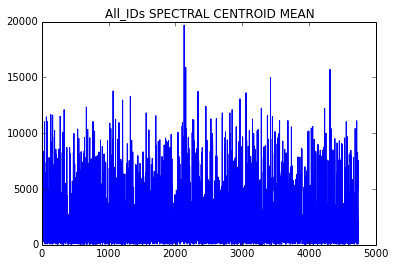

In [31]:
plt.title ('All_IDs SPECTRAL CENTROID MEAN')
plt.plot(sc_mean)

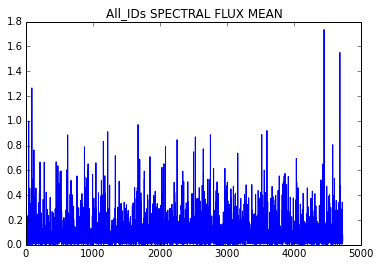

In [32]:
plt.title ('All_IDs SPECTRAL FLUX MEAN')
plt.plot(sflux_mean)


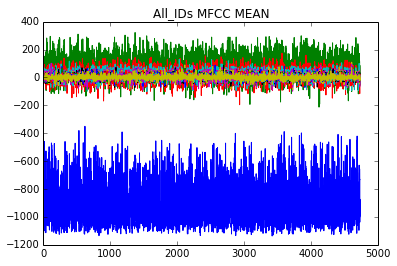

In [33]:
plt.title ('All_IDs MFCC MEAN')

plt.plot(mfcc_mean)


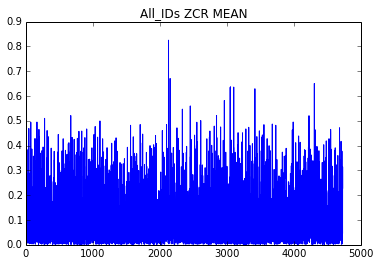

In [34]:
plt.title ('All_IDs ZCR MEAN')

plt.plot(zcr_mean)


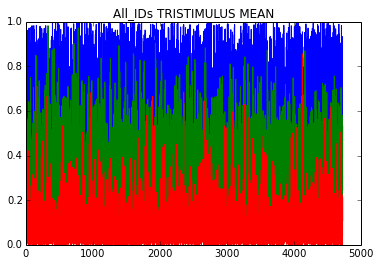

In [35]:
plt.title ('All_IDs TRISTIMULUS MEAN')
plt.plot(trist_mean)


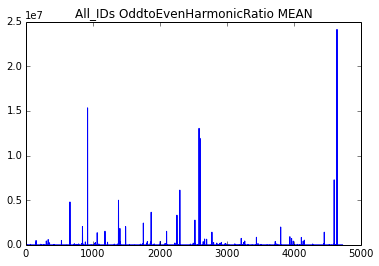

In [36]:
plt.title ('All_IDs OddtoEvenHarmonicRatio MEAN')
plt.plot(oteher_mean)